# Does climate impact the number of COVID cases?


This analysis takes a look at climate factors, including temperature and humidity, for ten cities around the United States.  Additionally, we look at the impact the climate factors have on time outside of the home in comparison to the amount of COVID cases. Does a warmer climate cause a higher new case rate of COVID in these cities? Does higher humidity mean higher percentage of cases? We also analyze the latitude of each city to see if that relates to climate and COVID-cases as well by utilizing Google API.


The cities we are using to analyze include: Boston, Dallas, Denver, Detroit, Honolulu, Los Angeles, Miami, New York City, San Francisco, and Seattle. We selected cities that have no overall bias to location within the United States to get as accurate description of different climates, while also picking similar metropolitan areas. 

# Back End Analysis

In [41]:
#Import Dependencies 
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import requests
from scipy.stats import linregress
from sklearn import datasets
import gmaps
import json
import random
from pprint import pprint
from citipy import citipy
import seaborn as sns
import scipy.stats as st


#import api_key - Jess
api_key="e9f34fe30c3508b1804ca865ed96b3b4"


# Configure gmaps
gmaps.configure(api_key=api_key)


#create city list
city_list=[
"Boston",
"Miami",
"Seattle",
"New York City",
"Dallas",
"Denver",
"Los Angeles", 
"San Francisco",
"Detroit",
"Honolulu",
]

In [2]:
#Reference & Read CSV files
csv_path_all="Resources/TempResources/marchseptember.csv"
csv_path_covid="Resources/TempResources/completed_covid_cases_data.csv"

city_data=pd.read_csv("Resources/DataFiles/GeoIDs - City.csv")
covid_daily_cases=pd.read_csv("Resources/DataFiles/COVID Cases - City - Daily.csv")
daily_mobility=pd.read_csv("Resources/DataFiles/Google Mobility - City - Daily.csv")

covid_df=pd.read_csv(csv_path_covid, encoding="utf-8")
city_df=pd.read_csv(csv_path_all, encoding="utf-8")



# COVID Cases & GPS Data

The following data was pulled from the Tracktherecovery.com and organized/cleaned by Will.

In [3]:
#Covid Case Information & GPS Information
city_data=city_data.loc[city_data['cityname'].isin(city_list)]
city_data



,cityid,cityname,stateabbrev,statename,statefips,city_pop2019
0,1,Los Angeles,CA,California,6,10039107
1,2,New York City,NY,New York,36,8336817
6,7,Dallas,TX,Texas,48,2635516
8,9,Seattle,WA,Washington,53,2252782
12,13,Detroit,MI,Michigan,26,1749343
20,21,San Francisco,CA,California,6,881549
24,25,Boston,MA,Massachusetts,25,803907
27,28,Denver,CO,Colorado,8,727211
37,38,Miami,FL,Florida,12,2716940
47,48,Honolulu,HI,Hawaii,15,974563


# Merging City Case Data

In [4]:
#merge city data and covid daily cases
merge1=pd.merge(city_data,covid_daily_cases,on="cityid",how="left")
merge1.head()

,cityid,cityname,stateabbrev,statename,statefips,city_pop2019,year,month,day,case_count,new_case_count,case_rate,new_case_rate
0,1,Los Angeles,CA,California,6,10039107,2020,1,21,0,0,0.0,.
1,1,Los Angeles,CA,California,6,10039107,2020,1,22,0,0,0.0,.
2,1,Los Angeles,CA,California,6,10039107,2020,1,23,0,0,0.0,.
3,1,Los Angeles,CA,California,6,10039107,2020,1,24,0,0,0.0,.
4,1,Los Angeles,CA,California,6,10039107,2020,1,25,0,0,0.0,.


In [5]:
data_df=pd.merge(merge1,daily_mobility,on=["cityid","month","day","year"],how="inner")
data_df

,cityid,cityname,stateabbrev,statename,statefips,city_pop2019,year,month,day,case_count,new_case_count,case_rate,new_case_rate,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces,gps_residential,gps_away_from_home
0,1,Los Angeles,CA,California,6,10039107,2020,2,24,1,0,0.00996,0,0.00571,-0.00286,.0714,0.00286,0.0214,-0.00143,0.000625
1,1,Los Angeles,CA,California,6,10039107,2020,2,25,1,0,0.00996,0,0.01000,-0.00143,.0743,0.00429,0.0229,-0.00286,0.002020
2,1,Los Angeles,CA,California,6,10039107,2020,2,26,1,0,0.00996,0,0.01570,0.00286,.0714,0.00571,0.0243,-0.00429,0.003620
3,1,Los Angeles,CA,California,6,10039107,2020,2,27,1,0,0.00996,0,0.01860,0.00571,.0757,0.00714,0.0243,-0.00429,0.003620
4,1,Los Angeles,CA,California,6,10039107,2020,2,28,1,0,0.00996,0,0.02290,0.01140,.08,0.01000,0.0257,-0.00571,0.005000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,48,Honolulu,HI,Hawaii,15,974563,2020,9,7,9000,89,923.00000,19.2,-0.41700,-0.15400,-.51,-0.62300,-0.4730,0.18900,-0.231000
2006,48,Honolulu,HI,Hawaii,15,974563,2020,9,8,9114,114,935.00000,18.6,-0.41700,-0.15600,-.521,-0.61000,-0.4260,0.17300,-0.212000
2007,48,Honolulu,HI,Hawaii,15,974563,2020,9,9,9202,88,944.00000,15.4,-0.41700,-0.15300,-.516,-0.61100,-0.4260,0.17300,-0.212000
2008,48,Honolulu,HI,Hawaii,15,974563,2020,9,10,9360,158,960.00000,15,-0.42000,-0.15600,-.503,-0.61000,-0.4260,0.17300,-0.212000


In [6]:
#concatenate
data_df["concat"] = data_df["month"].astype(str) + data_df["day"].astype(str)

In [7]:
data_df

,cityid,cityname,stateabbrev,statename,statefips,city_pop2019,year,month,day,case_count,...,case_rate,new_case_rate,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces,gps_residential,gps_away_from_home,concat
0,1,Los Angeles,CA,California,6,10039107,2020,2,24,1,...,0.00996,0,0.00571,-0.00286,.0714,0.00286,0.0214,-0.00143,0.000625,224
1,1,Los Angeles,CA,California,6,10039107,2020,2,25,1,...,0.00996,0,0.01000,-0.00143,.0743,0.00429,0.0229,-0.00286,0.002020,225
2,1,Los Angeles,CA,California,6,10039107,2020,2,26,1,...,0.00996,0,0.01570,0.00286,.0714,0.00571,0.0243,-0.00429,0.003620,226
3,1,Los Angeles,CA,California,6,10039107,2020,2,27,1,...,0.00996,0,0.01860,0.00571,.0757,0.00714,0.0243,-0.00429,0.003620,227
4,1,Los Angeles,CA,California,6,10039107,2020,2,28,1,...,0.00996,0,0.02290,0.01140,.08,0.01000,0.0257,-0.00571,0.005000,228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,48,Honolulu,HI,Hawaii,15,974563,2020,9,7,9000,...,923.00000,19.2,-0.41700,-0.15400,-.51,-0.62300,-0.4730,0.18900,-0.231000,97
2006,48,Honolulu,HI,Hawaii,15,974563,2020,9,8,9114,...,935.00000,18.6,-0.41700,-0.15600,-.521,-0.61000,-0.4260,0.17300,-0.212000,98
2007,48,Honolulu,HI,Hawaii,15,974563,2020,9,9,9202,...,944.00000,15.4,-0.41700,-0.15300,-.516,-0.61100,-0.4260,0.17300,-0.212000,99
2008,48,Honolulu,HI,Hawaii,15,974563,2020,9,10,9360,...,960.00000,15,-0.42000,-0.15600,-.503,-0.61000,-0.4260,0.17300,-0.212000,910


In [8]:
data_df["concat"] = data_df["concat"].astype(int)

completed_city_data=data_df.loc[(data_df['month'] >= 3)]

completed_city_data=completed_city_data.sort_values(by=['month', 'day'],ascending=False)

completed_city_data=completed_city_data[:-140]

In [9]:
completed_city_data.head()

,cityid,cityname,stateabbrev,statename,statefips,city_pop2019,year,month,day,case_count,...,case_rate,new_case_rate,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces,gps_residential,gps_away_from_home,concat
200,1,Los Angeles,CA,California,6,10039107,2020,9,11,252066,...,2511.0,8.05,-0.2910,-0.1170,-.0557,-0.431,-0.373,0.1200,-0.1420,911
401,2,New York City,NY,New York,36,8336817,2020,9,11,241936,...,2902.0,3.08,-0.2200,-0.0590,.812,-0.379,-0.413,0.1020,-0.1110,911
602,7,Dallas,TX,Texas,48,2635516,2020,9,11,78291,...,2971.0,12,-0.1570,-0.0886,.234,-0.336,-0.356,0.0843,-0.0959,911
803,9,Seattle,WA,Washington,53,2252782,2020,9,11,20718,...,920.0,3.97,-0.2500,-0.1060,.711,-0.503,-0.469,0.1360,-0.1490,911
1004,13,Detroit,MI,Michigan,26,1749343,2020,9,11,33138,...,1894.0,10.5,-0.0771,-0.0614,.,-0.350,-0.346,0.0614,-0.0638,911


In [10]:
completed_city_data['new_case_rate']=completed_city_data['new_case_rate'].astype(float)
completed_city_data['gps_away_from_home'] = pd.to_numeric(completed_city_data['gps_away_from_home'],errors='coerce')
#completed_city_data.to_csv("CSVFiles/completed_covid_cases_data.csv")

In [11]:
la_df = completed_city_data.loc[(completed_city_data['cityname'] =='Los Angeles')]
nyc_df=completed_city_data.loc[(completed_city_data['cityname'] =='New York City')]
dallas_df=completed_city_data.loc[(completed_city_data['cityname'] =='Dallas')]
seattle_df=completed_city_data.loc[(completed_city_data['cityname'] =='Seattle')]
detroit_df=completed_city_data.loc[(completed_city_data['cityname'] =='Detroit')]
sf_df=completed_city_data.loc[(completed_city_data['cityname'] =='San Francisco')]
boston_df=completed_city_data.loc[(completed_city_data['cityname'] =='Boston')]
denver_df=completed_city_data.loc[(completed_city_data['cityname'] =='Denver')]
miami_df=completed_city_data.loc[(completed_city_data['cityname'] =='Miami')]
honolulu_df=completed_city_data.loc[(completed_city_data['cityname'] =='Honolulu')]
march_df=completed_city_data.loc[(completed_city_data['month'] =='3')]
april_df=completed_city_data.loc[(completed_city_data['month'] =='4')]
may_df=completed_city_data.loc[(completed_city_data['month'] =='5')]
june_df=completed_city_data.loc[(completed_city_data['month'] =='6')]
july_df=completed_city_data.loc[(completed_city_data['month'] =='7')]
august_df=completed_city_data.loc[(completed_city_data['month'] =='8')]
september_df=completed_city_data.loc[(completed_city_data['month'] =='9')]







completed_city_data.dtypes

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


cityid                         int64
cityname                      object
stateabbrev                   object
statename                     object
statefips                      int64
city_pop2019                   int64
year                           int64
month                          int64
day                            int64
case_count                     int64
new_case_count                 int64
case_rate                    float64
new_case_rate                float64
gps_retail_and_recreation    float64
gps_grocery_and_pharmacy     float64
gps_parks                     object
gps_transit_stations         float64
gps_workplaces               float64
gps_residential              float64
gps_away_from_home           float64
concat                         int64
dtype: object

In [12]:
weather_averages=pd.read_csv("Resources/CSVFiles/marchseptember.csv")
city_average=completed_city_data.groupby(["cityname","month"]).agg({'gps_away_from_home':'mean'})
city_average=city_average.reset_index()

In [13]:
city_average=city_average.rename(columns={"cityname": "Name", "month": "Period"})
temp_outside_df=pd.merge(weather_averages,city_average, on=["Name","Period"])
temp_outside_df.rename(columns={"gps_parks": "Time Spend not at home vs Baseline"})

,Name,Period,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,gps_away_from_home
0,Dallas,3,88.1,42.2,64.4,37.2,88.1,8.97,NaN,23.0,40.3,8.8,66.9,69.38,-0.161682
1,Dallas,4,96.2,41.0,65.9,33.1,93.7,1.27,NaN,27.7,40.3,9.5,58.8,60.76,-0.236500
2,Dallas,5,95.0,55.1,75.2,NaN,101.1,4.77,NaN,25.3,43.0,9.7,52.1,61.31,-0.167161
3,Dallas,6,99.0,65.0,83.7,NaN,101.4,5.97,NaN,31.1,49.2,9.7,41.9,54.04,-0.123500
4,Dallas,7,101.9,74.0,86.4,NaN,110.3,1.46,NaN,23.0,55.3,9.8,44.9,59.85,-0.130387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Miami,5,87.7,66.5,78.9,NaN,93.6,14.60,NaN,23.7,33.8,9.4,13.9,72.73,-0.229871
66,Miami,6,90.2,74.7,83.4,NaN,100.3,5.63,NaN,15.7,24.2,9.8,12.7,75.05,-0.164167
67,Miami,7,96.2,74.9,84.6,NaN,105.5,10.16,NaN,21.8,33.3,9.7,16.9,72.30,-0.174065
68,Miami,8,92.0,75.2,85.2,NaN,104.9,7.38,NaN,24.9,35.8,9.7,15.9,73.98,-0.161613


# Temperature Data

The following data was pulled from Visualcrossing.com and created/cleaned by Jess.

In [14]:
#Clean Dataframes
del city_df["Wind Chill"]
del city_df["Heat Index"]
del city_df["Snow Depth"]
del city_df["Visibility"]

#Rename Headers
city_df=city_df.rename(columns={"Period":"month"})

In [15]:
city_df

,Name,month,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Wind Gust,Cloud Cover,Relative Humidity
0,Dallas,3,88.1,42.2,64.4,8.97,23.0,40.3,66.9,69.38
1,Dallas,4,96.2,41.0,65.9,1.27,27.7,40.3,58.8,60.76
2,Dallas,5,95.0,55.1,75.2,4.77,25.3,43.0,52.1,61.31
3,Dallas,6,99.0,65.0,83.7,5.97,31.1,49.2,41.9,54.04
4,Dallas,7,101.9,74.0,86.4,1.46,23.0,55.3,44.9,59.85
...,...,...,...,...,...,...,...,...,...,...
65,Miami,5,87.7,66.5,78.9,14.60,23.7,33.8,13.9,72.73
66,Miami,6,90.2,74.7,83.4,5.63,15.7,24.2,12.7,75.05
67,Miami,7,96.2,74.9,84.6,10.16,21.8,33.3,16.9,72.30
68,Miami,8,92.0,75.2,85.2,7.38,24.9,35.8,15.9,73.98


In [16]:
#create dataframe grouped by City and Month
month_temp=city_df.groupby(["Name", "month"])
month_temp.head()

,Name,month,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Wind Gust,Cloud Cover,Relative Humidity
0,Dallas,3,88.1,42.2,64.4,8.97,23.0,40.3,66.9,69.38
1,Dallas,4,96.2,41.0,65.9,1.27,27.7,40.3,58.8,60.76
2,Dallas,5,95.0,55.1,75.2,4.77,25.3,43.0,52.1,61.31
3,Dallas,6,99.0,65.0,83.7,5.97,31.1,49.2,41.9,54.04
4,Dallas,7,101.9,74.0,86.4,1.46,23.0,55.3,44.9,59.85
...,...,...,...,...,...,...,...,...,...,...
65,Miami,5,87.7,66.5,78.9,14.60,23.7,33.8,13.9,72.73
66,Miami,6,90.2,74.7,83.4,5.63,15.7,24.2,12.7,75.05
67,Miami,7,96.2,74.9,84.6,10.16,21.8,33.3,16.9,72.30
68,Miami,8,92.0,75.2,85.2,7.38,24.9,35.8,15.9,73.98


In [17]:
#find just detroit information and create dataframe
det_df=city_df.loc[city_df["Name"] == "Detroit", :]
det_df

,Name,month,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Wind Gust,Cloud Cover,Relative Humidity
49,Detroit,3,63.6,20.6,40.5,2.79,31.8,52.8,34.1,72.02
50,Detroit,4,70.0,25.8,44.9,1.76,29.6,49.4,31.7,64.55
51,Detroit,5,88.8,30.1,57.3,3.34,23.4,43.6,27.1,65.69
52,Detroit,6,91.5,47.6,71.4,3.90,28.8,47.2,13.5,60.45
53,Detroit,7,93.5,62.8,77.4,4.93,16.7,37.8,14.8,67.06
54,Detroit,8,92.3,57.4,73.2,6.74,19.9,34.4,16.7,68.78
55,Detroit,9,83.7,39.1,63.7,2.55,23.7,40.3,19.9,71.62


In [18]:
#read and clean COVID data
covid_df

,Unnamed: 0,cityid,cityname,stateabbrev,statename,statefips,city_pop2019,year,month,day,...,new_case_count,case_rate,new_case_rate,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces,gps_residential,gps_away_from_home
0,200,1,Los Angeles,CA,California,6,10039107,2020,9,11,...,1042,2511.000,8.0500,-0.2910,-0.1170,-0.0557,-0.431,-0.37300,0.1200,-0.1420
1,401,2,New York City,NY,New York,36,8336817,2020,9,11,...,250,2902.000,3.0800,-0.2200,-0.0590,0.8120,-0.379,-0.41300,0.1020,-0.1110
2,602,7,Dallas,TX,Texas,48,2635516,2020,9,11,...,343,2971.000,12.0000,-0.1570,-0.0886,0.2340,-0.336,-0.35600,0.0843,-0.0959
3,803,9,Seattle,WA,Washington,53,2252782,2020,9,11,...,133,920.000,3.9700,-0.2500,-0.1060,0.7110,-0.503,-0.46900,0.1360,-0.1490
4,1004,13,Detroit,MI,Michigan,26,1749343,2020,9,11,...,261,1894.000,10.5000,-0.0771,-0.0614,NaN,-0.350,-0.34600,0.0614,-0.0638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,1025,21,San Francisco,CA,California,6,881549,2020,3,15,...,6,4.200,0.4210,-0.2190,0.0829,-0.1360,-0.343,-0.22900,0.1110,-0.1410
1806,1226,25,Boston,MA,Massachusetts,25,803907,2020,3,15,...,4,3.860,0.3910,-0.0957,0.1460,0.1960,-0.193,-0.07860,0.0386,-0.0517
1807,1427,28,Denver,CO,Colorado,8,727211,2020,3,15,...,5,3.850,0.5110,-0.0643,0.2410,0.3140,-0.160,-0.02290,0.0243,-0.0365
1808,1628,38,Miami,FL,Florida,12,2716940,2020,3,15,...,5,0.478,0.0684,-0.0286,0.1300,-0.0729,-0.123,-0.00571,0.0214,-0.0334


In [19]:
#Clean and Rename Headers
covid_data=covid_df.rename(columns={"cityid":"City ID", "cityname":"Name",
                                    "stateabbrev":"Abbreviation","statename":"State Name",
                                   "city_pop2019": "City Population", "year": "Year",
                                   "new_case_count": "New Case Count", "case_rate": "Case Rate",
                                   "new_case_rate": "New Case Rate", "case_count": "Case Count"})

del covid_data["gps_retail_and_recreation"]
del covid_data["gps_grocery_and_pharmacy"]
del covid_data["gps_parks"]
del covid_data["gps_transit_stations"]
del covid_data["gps_workplaces"]
del covid_data["gps_residential"]
del covid_data["gps_away_from_home"]







covid_data

,Unnamed: 0,City ID,Name,Abbreviation,State Name,statefips,City Population,Year,month,day,Case Count,New Case Count,Case Rate,New Case Rate
0,200,1,Los Angeles,CA,California,6,10039107,2020,9,11,252066,1042,2511.000,8.0500
1,401,2,New York City,NY,New York,36,8336817,2020,9,11,241936,250,2902.000,3.0800
2,602,7,Dallas,TX,Texas,48,2635516,2020,9,11,78291,343,2971.000,12.0000
3,803,9,Seattle,WA,Washington,53,2252782,2020,9,11,20718,133,920.000,3.9700
4,1004,13,Detroit,MI,Michigan,26,1749343,2020,9,11,33138,261,1894.000,10.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,1025,21,San Francisco,CA,California,6,881549,2020,3,15,37,6,4.200,0.4210
1806,1226,25,Boston,MA,Massachusetts,25,803907,2020,3,15,31,4,3.860,0.3910
1807,1427,28,Denver,CO,Colorado,8,727211,2020,3,15,28,5,3.850,0.5110
1808,1628,38,Miami,FL,Florida,12,2716940,2020,3,15,13,5,0.478,0.0684


In [20]:
#Create Grouped dataframe by Month and Sums
month_covid=covid_data.groupby(["Name", "month"])
month_covid.sum()



Unnamed: 0  City ID  statefips  City Population   Year  day  \
Name    month                                                                
Boston  3           20978      425        425         13666419  34340  391   
        4           37725      750        750         24117210  60600  465   
        5           39928      775        775         24921117  62620  496   
        6           39555      750        750         24117210  60600  465   
        7           41819      775        775         24921117  62620  496   
...                   ...      ...        ...              ...    ...  ...   
Seattle 5           21235      279       1643         69836242  62620  496   
        6           21465      270       1590         67583460  60600  465   
        7           23126      279       1643         69836242  62620  496   
        8           24087      279       1643         69836242  62620  496   
        9            8778       99        583         24780602  22220   66   

               Case Count  New Case Count  Case Rate  New Case Rate  
Name    month                                                        
Boston  3            6639            1346      826.5         98.821  
        4          205735           11517    25591.0       1372.600  
        5          497778            5046    61920.0        727.920  
        6          579350            1883    72065.0        253.500  
        7          634468            1403    78923.0        156.210  
...                   ...             ...        ...            ...  
Seattle 5          228112            1851    10126.0         88.560  
        6          269119            2037    11950.0         81.680  
        7          393928            5018    17487.0        218.600  
        8          546508            4468    24259.0        203.010  
        9          222507            1034     9878.0         48.300  

[70 rows x 10 columns]

In [21]:
# Converting a GroupBy object into a DataFrame
month_new_case = pd.DataFrame(month_covid["New Case Count"].sum())

month_new_case.reset_index()

,Name,month,New Case Count
0,Boston,3,1346
1,Boston,4,11517
2,Boston,5,5046
3,Boston,6,1883
4,Boston,7,1403
...,...,...,...
65,Seattle,5,1851
66,Seattle,6,2037
67,Seattle,7,5018
68,Seattle,8,4468


In [22]:
#converting temperature data in to a dtaframe
city_month_temp = pd.DataFrame(month_temp["Temperature"].sum())
city_month_temp.reset_index()

,Name,month,Temperature
0,Boston,3,42.8
1,Boston,4,45.9
2,Boston,5,58.0
3,Boston,6,69.5
4,Boston,7,75.5
...,...,...,...
65,Seattle,5,59.0
66,Seattle,6,61.7
67,Seattle,7,66.8
68,Seattle,8,67.8


In [23]:
#write to csvs
city_month_temp.to_csv("Resources/city_month_temp_1.csv", index=True, header=True)
month_new_case.to_csv("Resources/month_new_case_1.csv", index=True, header=True)

csv_path_merge="Resources/TempResources/temp_new_cases_combined.csv"
merge_df=pd.read_csv(csv_path_merge, encoding="utf-8")

merge_df=merge_df.rename(columns={"new_case_count": "New Case Count", "temperature": "Temperature"})
merge_df

,Name,month,New Case Count,Temperature
0,Boston,3,1346,42.8
1,Boston,4,11517,45.9
2,Boston,5,5046,58.0
3,Boston,6,1883,69.5
4,Boston,7,1403,75.5
...,...,...,...,...
65,Seattle,5,1851,59.0
66,Seattle,6,2037,61.7
67,Seattle,7,5018,66.8
68,Seattle,8,4468,67.8


In [24]:
#Creat a dataframe for the monthly Relative Humidity
city_month_humidity = pd.DataFrame(month_temp["Relative Humidity"].sum())
city_month_humidity.reset_index()




,Name,month,Relative Humidity
0,Boston,3,57.33
1,Boston,4,59.53
2,Boston,5,57.51
3,Boston,6,64.90
4,Boston,7,70.02
...,...,...,...
65,Seattle,5,63.60
66,Seattle,6,66.02
67,Seattle,7,60.34
68,Seattle,8,59.93


In [26]:
#Write to CSV
city_month_humidity.to_csv("Resources/TempResources/city_month_humidity_1.csv", index=True, header=True)

csv_path_humidity="Resources/TempResources/humidity_new_cases_combined.csv"
humidity_merge_df=pd.read_csv(csv_path_humidity, encoding="utf-8")

humidity_merge_df=humidity_merge_df.rename(columns={"new_case_count": "New Case Count"})


humidity_merge_df

,Name,month,New Case Count,Relative Humidity
0,Boston,3,1346,57.33
1,Boston,4,11517,59.53
2,Boston,5,5046,57.51
3,Boston,6,1883,64.90
4,Boston,7,1403,70.02
...,...,...,...,...
65,Seattle,5,1851,63.60
66,Seattle,6,2037,66.02
67,Seattle,7,5018,60.34
68,Seattle,8,4468,59.93


In [27]:
#Create a detroit humidity dataframe
detroit_humidity=humidity_merge_df.loc[merge_df["Name"]=="Detroit",:]

detroit_humidity

,Name,month,New Case Count,Relative Humidity
21,Detroit,3,3727,72.02
22,Detroit,4,13014,64.55
23,Detroit,5,3689,65.69
24,Detroit,6,2353,60.45
25,Detroit,7,4301,67.06
26,Detroit,8,4164,68.78
27,Detroit,9,1882,71.62


In [28]:
#Create a dataframe for Detroit Data
detroit_merge=merge_df.loc[merge_df["Name"]=="Detroit",:]
detroit_merge

,Name,month,New Case Count,Temperature
21,Detroit,3,3727,40.5
22,Detroit,4,13014,44.9
23,Detroit,5,3689,57.3
24,Detroit,6,2353,71.4
25,Detroit,7,4301,77.4
26,Detroit,8,4164,73.2
27,Detroit,9,1882,63.7


# Cities API Pull - Latitudes

The data below is pulled from a Google API to find the Latitude of the respective 10 cities.

In [29]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key="e9f34fe30c3508b1804ca865ed96b3b4"

# Build partial query URL
query_url = f"{url}appid={api_key}&q="

In [30]:
cities = ["Boston", "Dallas", "Denver", "Detroit", "Honolulu", "Los Angeles", "Miami", "New York City", "San Francisco", "Seattle"]

# set up lists to hold reponse info
lat = []


# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])


print(f"The latitude information received is: {lat}")

The latitude information received is: [42.36, 32.77, 39.74, 42.33, 21.31, 34.05, 25.77, 40.71, 37.77, 47.61]


In [31]:
# create a data frame from cities and lat
lat_dict = {
    "city": cities,
    "lat": lat,
}
lat_data = pd.DataFrame(lat_dict)

lat_data=lat_data.rename(columns={"city":"Name"})

lat_data

,Name,lat
0,Boston,42.36
1,Dallas,32.77
2,Denver,39.74
3,Detroit,42.33
4,Honolulu,21.31
5,Los Angeles,34.05
6,Miami,25.77
7,New York City,40.71
8,San Francisco,37.77
9,Seattle,47.61


In [32]:
month_sums=month_new_case.groupby("Name").sum()
month_sums.reset_index()

,Name,New Case Count
0,Boston,23005
1,Dallas,78280
2,Denver,11662
3,Detroit,33130
4,Honolulu,9501
5,Los Angeles,252013
6,Miami,163366
7,New York City,241667
8,San Francisco,10160
9,Seattle,20329


In [33]:
# Merge two dataframes using an outer join
lat_merge_df = pd.merge(lat_data, month_sums, on="Name", how="outer")
lat_merge_df

,Name,lat,New Case Count
0,Boston,42.36,23005
1,Dallas,32.77,78280
2,Denver,39.74,11662
3,Detroit,42.33,33130
4,Honolulu,21.31,9501
5,Los Angeles,34.05,252013
6,Miami,25.77,163366
7,New York City,40.71,241667
8,San Francisco,37.77,10160
9,Seattle,47.61,20329


# Visualizing the Data

Below you will find a series of 9 scatterplots that find any potential correlation between the following:

1. Average Temperature (F) vs. New Case Count (Monthly) - All Cities
2. Average Temperature (F) vs. New Case Count (Monthly) - Detroit
3. Relative Humidity (%) vs. New Case Count (Monthly) - All Cities
4. Relative Humidity (%) vs. New Case Count (Monthly) - Detroit
5. Avg Time spent away from Home(vs the baseline) vs New Covid Case Count
6. Detroit Time spent away from home(vs the baseline) vs New Covid Cases
7. Avg Time spent away from Home(vs the baseline) vs Average Monthly Temperature
8. Detroit Avg Time spent away from Home(vs the baseline) vs Average Monthly Temperature
9. Latitude vs. Total New Cases (March - September)



The r-value is: 0.0024976965524163915
y = 92.14x + 5825.1


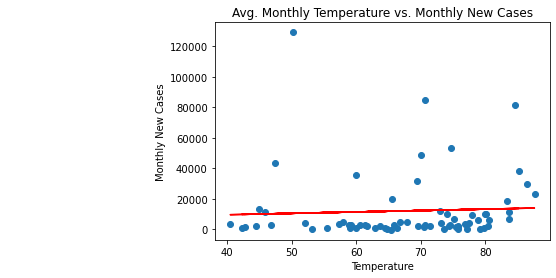

In [34]:
# Add the linear regression equation and line to plot
x_values = merge_df['Temperature']
y_values = merge_df['New Case Count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Avg. Monthly Temperature vs. Monthly New Cases")
plt.xlabel('Temperature')
plt.ylabel('Monthly New Cases')
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

The r-value is: 0.23151234711800697
y = -126.67x + 12485.15


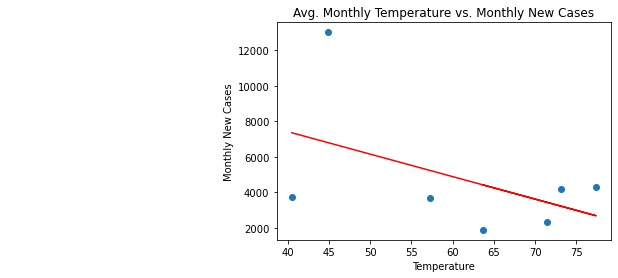

In [35]:
# Add the linear regression equation and line to plot
x_values = detroit_merge['Temperature']
y_values = detroit_merge['New Case Count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Avg. Monthly Temperature vs. Monthly New Cases")
plt.xlabel('Temperature')
plt.ylabel('Monthly New Cases')
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

The r-value is: 0.03481520600791169
y = 204.2x + 513.93


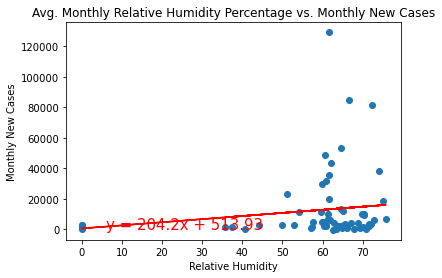

In [36]:
# Add the linear regression equation and line to plot
x_values = humidity_merge_df['Relative Humidity']
y_values = humidity_merge_df['New Case Count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Avg. Monthly Relative Humidity Percentage vs. Monthly New Cases")
plt.xlabel('Relative Humidity')
plt.ylabel('Monthly New Cases')
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

The r-value is: 0.05997634865660759
y = -225.6x + 19885.77


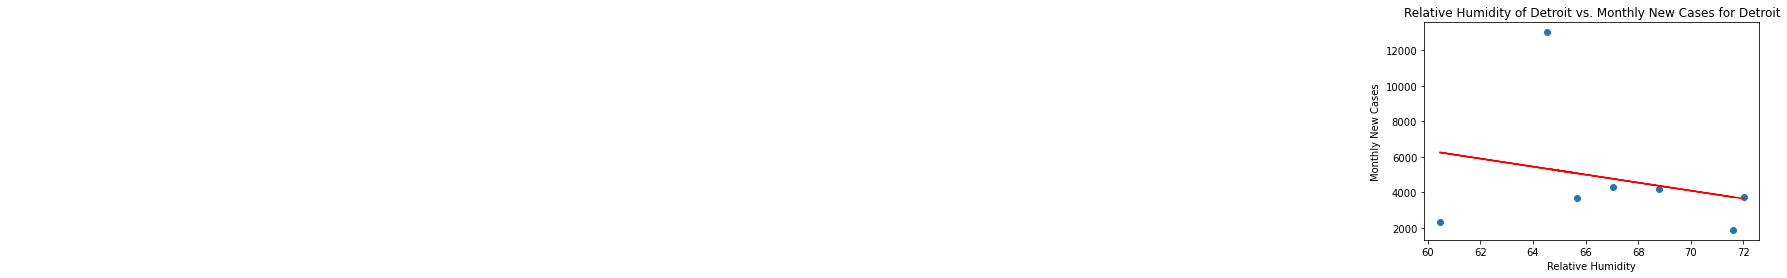

In [37]:
# Add the linear regression equation and line to plot
x_values = detroit_humidity['Relative Humidity']
y_values = detroit_humidity['New Case Count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Relative Humidity of Detroit vs. Monthly New Cases for Detroit")
plt.xlabel('Relative Humidity')
plt.ylabel('Monthly New Cases')
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

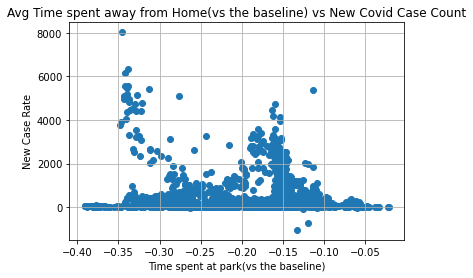

In [38]:

plt.scatter(completed_city_data['gps_away_from_home'],completed_city_data['new_case_count'])
plt.title("Avg Time spent away from Home(vs the baseline) vs New Covid Case Count")
plt.ylabel("New Case Rate")
plt.xlabel("Time spent at park(vs the baseline)")
plt.grid(True)



The corrleation coefficient is -0.61 meaning there is a moderate negative correlation.
The Linear Regress model for this is y=-1311.54x + 6.51


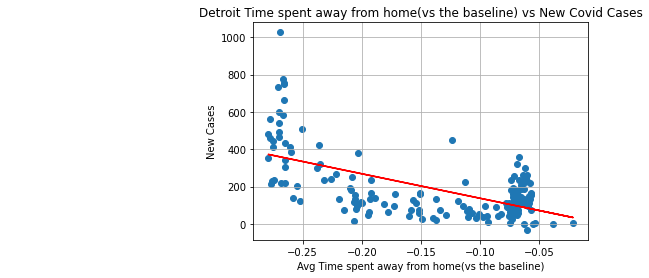

In [42]:
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(detroit_df['gps_away_from_home'],detroit_df['new_case_count'])

regress_values = slope*detroit_df['gps_away_from_home']+intercept

line_eq = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(detroit_df['gps_away_from_home'],detroit_df['new_case_count'])
plt.title("Detroit Time spent away from home(vs the baseline) vs New Covid Cases")
plt.ylabel("New Cases")
plt.grid(True)
plt.xlabel("Avg Time spent away from home(vs the baseline)")
plt.annotate(line_eq,(-.5,25),fontsize=15,color="r")
plt.plot(detroit_df['gps_away_from_home'],regress_values,"r",)


print(f'The corrleation coefficient is {round(rvalue,2)} meaning there is a moderate negative correlation.')
print(f'The Linear Regress model for this is {line_eq}')

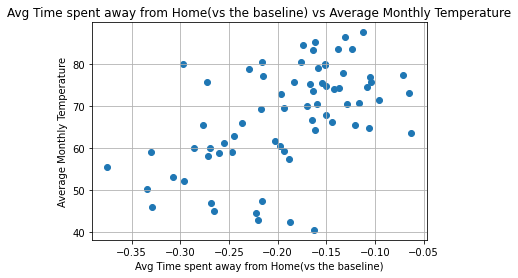

In [43]:
plt.scatter(temp_outside_df['gps_away_from_home'],temp_outside_df['Temperature'])
plt.title("Avg Time spent away from Home(vs the baseline) vs Average Monthly Temperature")
plt.ylabel("Average Monthly Temperature")
plt.xlabel("Avg Time spent away from Home(vs the baseline)")
plt.grid(True)



The corrleation coefficient is 0.81 meaning there is a strong positive correlation.
The Linear Regress model for this is y=148.02x + 80.48


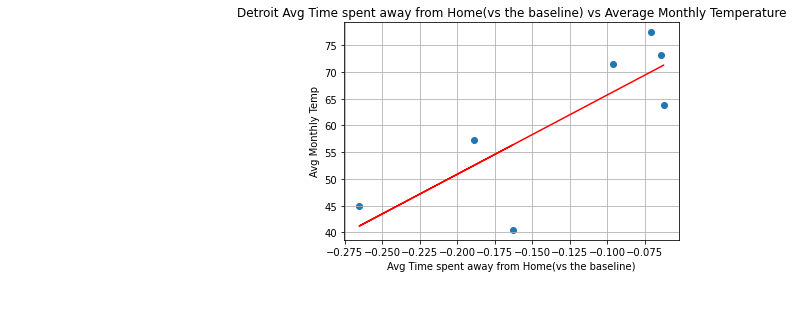

In [44]:

detroit=temp_outside_df.loc[(temp_outside_df['Name'] =='Detroit')]


(slope,intercept,rvalue,pvalue,stderr)=st.linregress(detroit['gps_away_from_home'],detroit['Temperature'])

regress_values = slope*detroit['gps_away_from_home']+intercept

line_eq = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(detroit['gps_away_from_home'],detroit['Temperature'])
plt.title("Detroit Avg Time spent away from Home(vs the baseline) vs Average Monthly Temperature")
plt.ylabel("Avg Monthly Temp")
plt.grid(True)
plt.xlabel("Avg Time spent away from Home(vs the baseline)")
plt.annotate(line_eq,(-.5,25),fontsize=15,color="r")
plt.plot(detroit['gps_away_from_home'],regress_values,"r",)


print(f'The corrleation coefficient is {round(rvalue,2)} meaning there is a strong positive correlation.')
print(f'The Linear Regress model for this is {line_eq}')

The r-value is: 0.025536433591689955
y = -1933.84x + 154784.39


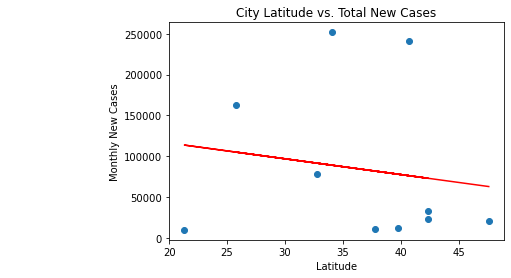

In [45]:
# Add the linear regression equation and line to plot
x_values = lat_merge_df['lat']
y_values = lat_merge_df['New Case Count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("City Latitude vs. Total New Cases")
plt.xlabel('Latitude')
plt.ylabel('Monthly New Cases')
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

# Final Analysis & Limitations



1. Individual City/State Reaction to COVID
A. Did the cities in our study put Stay at Home Orders in place? If so, when did the initial order start and how long did it last?
B. Outside of Stay at Home Orders, were restrictions on public places put in place? How strict were the guidelines for people being allowed to leave their homes?
        
2. Sample Size and Profile
A. Did 10 cities accurately reflect the country?
B. Could we have found better data sources to pull both the historical weather, COVID tracker, and GPS data from?
    
3. Weather Standards
A. What is considered normal weather for the selected cities? Are we able to see outliers in weather patterns that may had led to an increase/decrease in cases or time spent outside the home?
    
4. Time-Series Data
A.What other factors occurring during the same time could have led to our conclusions?

5. Timing
A.Will had a poorly timed vacation and could not put as much time/effort into the project. 

Based on our research, we can conclude that there is no strong correlation between the ten cities' weather (temperature/relative humidity) and increases with new COVID cases.  In regards to time spent outside, we did find a positive correlation between increased temperatures and time spent away from the home. However, as the populations spent more time away from home, the COVID new cases did not increase. 